In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [7]:
df = pd.read_csv("C:/Users/USER/Desktop/AI_Study/dataset/diabets.csv")
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


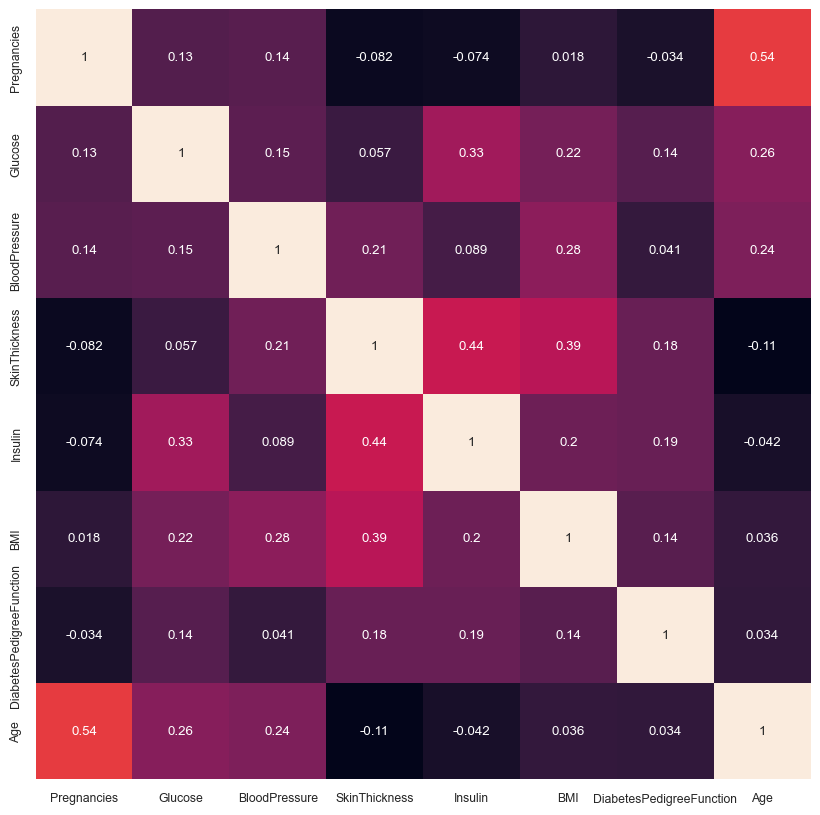

In [8]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X = df.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [11]:
y = df['BMI']
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 7) (576,)
(192, 7) (192,)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 7.208860459585852


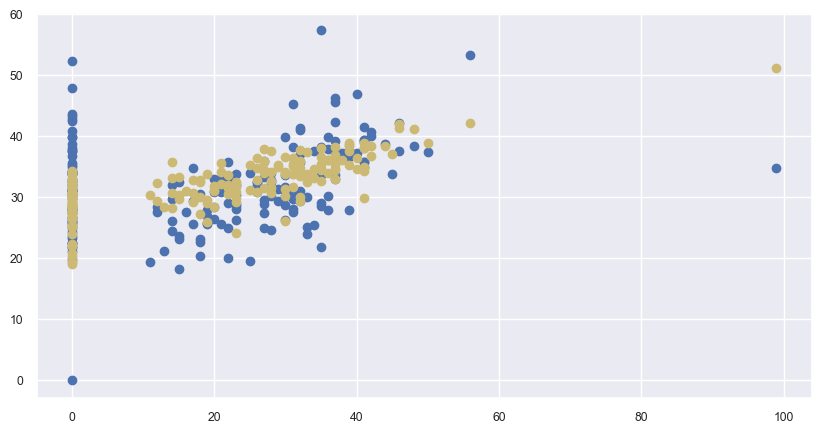

In [15]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 9.550946179131502


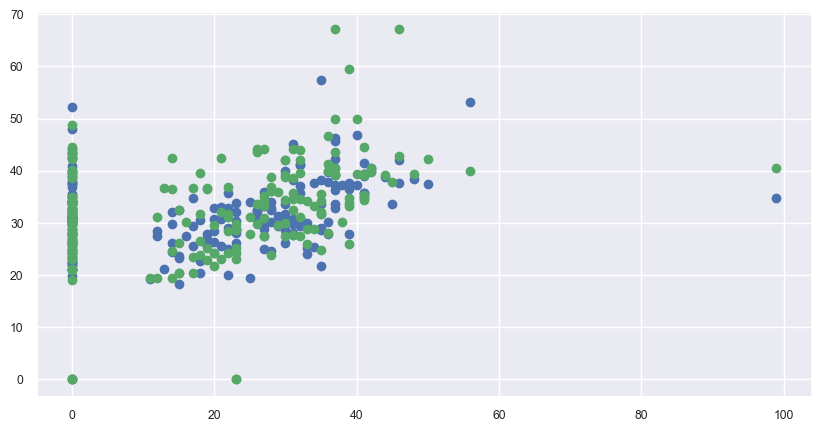

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='dy_preds')
plt.show() 

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 6.856900192886602


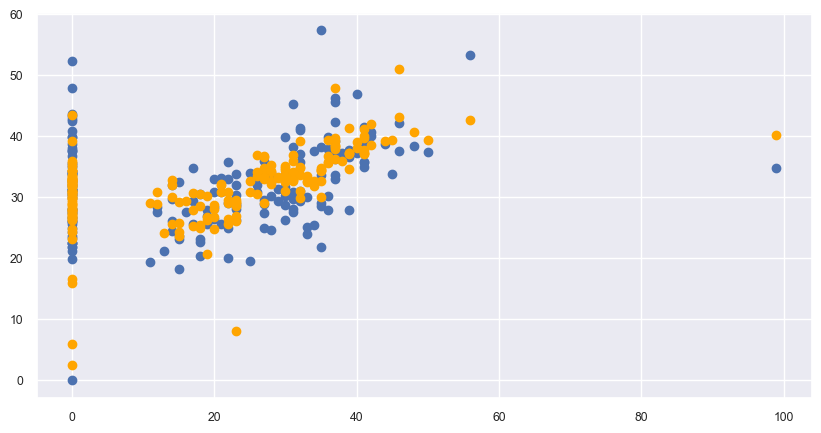

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()         

In [20]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 7.106055547212911


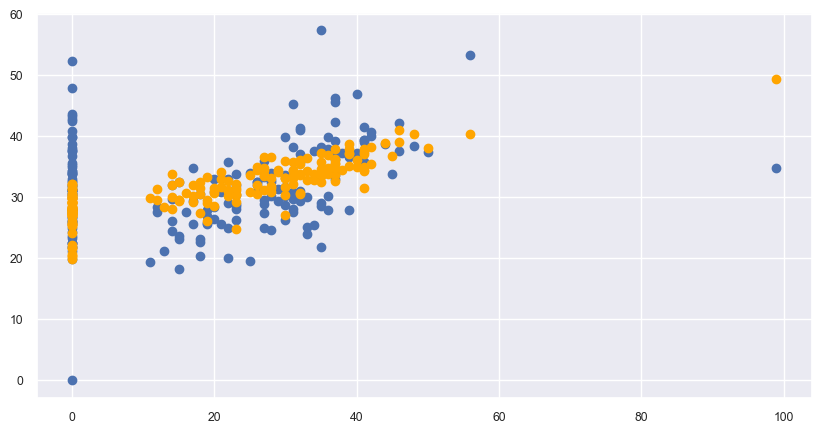

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()    